In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from shapely.geometry import Polygon
import os
os.listdir()

['.git',
 '.idea',
 'data',
 'main.py',
 'models',
 'NoSidewalk.html',
 'NoSidewalk.png',
 'Notebook.ipynb',
 'notebooks',
 'README.md',
 'requirements.txt']

###### Funciones

In [47]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):

    # This is the space between the end of the bar and the label
    padding = 4

    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle

        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle,
            y=value + padding,
            s=label,
            ha=alignment,
            va="center",
            rotation=rotation,
            rotation_mode="anchor"
        )

def fill_colore(n, lista):
    colores = []
    for i in lista:
        for j in range(n):
            colores.append(i)
    return colores

# Datos SideWalk

## Barrios

In [2]:
polygonsDir = "data/Neighborhood.csv"
polygonsDf = pd.read_csv(polygonsDir)
"Access Score: Neighborhood"
polygonsDf

,Neighborhood Name,Region ID,Access Score,Coordinates,Coverage,Average Curb Ramp Score,Average No Curb Ramp Score,Average Obstacle Score,Average Surface Problem Score,Curb Ramp Significance,No Curb Ramp Significance,Obstacle Significance,Surface Problem Significance
0,San Pedro,7,1.614317e-18,"[(-100.40247,25.670032),(-100.402471,25.670114...",1.000000,3.819137,12.542590,19.591599,11.697783,0.75,-1.0,-1.0,-1.0
1,Industrial,2,3.161211e-11,"[(-100.397935,25.674987),(-100.397985,25.67469...",1.000000,2.694656,5.625954,12.572519,8.000000,0.75,-1.0,-1.0,-1.0
2,Lomas,10,2.049709e-09,"[(-100.373525,25.632314),(-100.373574,25.63229...",0.998888,0.890869,7.010022,9.255011,4.408686,0.75,-1.0,-1.0,-1.0
3,Los Callejones,8,3.974972e-10,"[(-100.398028,25.671005),(-100.397889,25.67131...",1.000000,3.064815,6.314815,10.495370,7.134259,0.75,-1.0,-1.0,-1.0
4,Del Valle,9,2.280036e-12,"[(-100.352777,25.653401),(-100.352794,25.65339...",1.000000,1.812436,8.522936,11.116208,8.527013,0.75,-1.0,-1.0,-1.0
5,San Angel,11,3.918397e-06,"[(-100.362415,25.619483),(-100.362438,25.61943...",1.000000,0.996479,3.434859,6.161972,3.600352,0.75,-1.0,-1.0,-1.0
6,Rio Santa Catarina,3,3.906876e-07,"[(-100.374982,25.667635),(-100.37647,25.667497...",1.000000,2.621429,5.021429,6.364286,5.335714,0.75,-1.0,-1.0,-1.0


## Puntos

In [6]:
pointDir = "data/attributesWithLabels.csv"
pointsDf = pd.read_csv(pointDir)

In [8]:
usefulCols = [
    'Label Type', 'Attribute Severity','Street ID',
    'Neighborhood Name', 'Label ID', 'Attribute Latitude',
    'Attribute Longitude', 'Heading','Pitch', 'Label Severity',
    'Agree Count', 'Disagree Count', 'Not Sure Count']

pointsDf = pointsDf[usefulCols]
pointsDf

,Label Type,Attribute Severity,Street ID,Neighborhood Name,Label ID,Attribute Latitude,Attribute Longitude,Heading,Pitch,Label Severity,Agree Count,Disagree Count,Not Sure Count
0,NoSidewalk,3.0,1872,San Pedro,25995,25.653610,-100.393234,341.500000,-26.000000,3.0,0,0,0
1,Occlusion,NaN,196,San Pedro,29885,25.660402,-100.412460,228.647320,-13.294642,NaN,0,0,0
2,Occlusion,NaN,427,San Pedro,29801,25.659020,-100.411180,271.040200,-18.035715,NaN,0,0,0
3,SurfaceProblem,5.0,446,San Pedro,29865,25.660852,-100.411870,36.147320,-14.187500,NaN,1,0,0
4,SurfaceProblem,4.0,673,San Pedro,29785,25.658790,-100.411530,209.296880,-24.285715,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86103,NoCurbRamp,5.0,1546,Del Valle,17238,25.669413,-100.363846,66.140625,-13.482142,5.0,0,0,0
86104,NoCurbRamp,5.0,6609,San Pedro,17171,25.661179,-100.404060,62.687500,-35.000000,5.0,1,0,0
86105,NoSidewalk,5.0,2355,Lomas,83909,25.644321,-100.364880,314.616060,-14.642858,5.0,0,0,0
86106,SurfaceProblem,3.0,5650,Lomas,89655,25.646477,-100.369415,126.410710,-17.062500,3.0,0,0,0


### Graficos circulares Conteos


In [19]:
cols = ["Peso","Conteo","Variable","Name" ]
cols = ["Attribute Severity","Conteo","Label Type","Label TypeN"]

df = pointsDf[pointsDf["Neighborhood Name"] == "San Pedro"].copy()
df_grouped = df.groupby(by=["Label Type", "Attribute Severity"], as_index=False).size()
df_grouped["ColName"] = df_grouped["Label Type"] + df_grouped["Attribute Severity"].astype(str)
df_grouped

,Label Type,Attribute Severity,size,ColName
0,CurbRamp,1.0,331,CurbRamp1.0
1,CurbRamp,2.0,478,CurbRamp2.0
2,CurbRamp,3.0,462,CurbRamp3.0
3,CurbRamp,4.0,209,CurbRamp4.0
4,CurbRamp,5.0,59,CurbRamp5.0
5,NoCurbRamp,1.0,20,NoCurbRamp1.0
6,NoCurbRamp,2.0,70,NoCurbRamp2.0
7,NoCurbRamp,3.0,741,NoCurbRamp3.0
8,NoCurbRamp,4.0,3254,NoCurbRamp4.0
9,NoCurbRamp,5.0,2739,NoCurbRamp5.0


In [51]:
df_grouped2 = pd.DataFrame()
for id, df_ in df_grouped.groupby("Label Type"):

    df_["label"] = df_["size"].apply(lambda x: str(round(x/sum(df_["size"])*100,1))+" %")
    df_["size"] = df_["size"].apply(lambda x: round(x/sum(df_["size"])*100,1))
    df_grouped2 = pd.concat([df_grouped2, df_])

df_grouped2

,Label Type,Attribute Severity,size,ColName,label
0,CurbRamp,1.0,21.5,CurbRamp1.0,21.5 %
1,CurbRamp,2.0,31.1,CurbRamp2.0,31.1 %
2,CurbRamp,3.0,30.0,CurbRamp3.0,30.0 %
3,CurbRamp,4.0,13.6,CurbRamp4.0,13.6 %
4,CurbRamp,5.0,3.8,CurbRamp5.0,3.8 %
5,NoCurbRamp,1.0,0.3,NoCurbRamp1.0,0.3 %
6,NoCurbRamp,2.0,1.0,NoCurbRamp2.0,1.0 %
7,NoCurbRamp,3.0,10.9,NoCurbRamp3.0,10.9 %
8,NoCurbRamp,4.0,47.7,NoCurbRamp4.0,47.7 %
9,NoCurbRamp,5.0,40.1,NoCurbRamp5.0,40.1 %


La shula


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


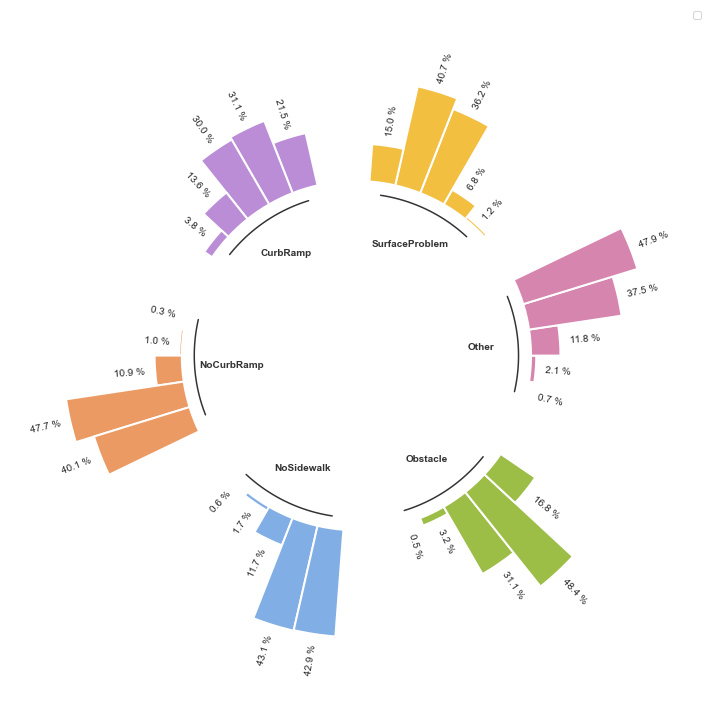

In [57]:
ANGLES = np.linspace(0, 2 * np.pi, len(df_grouped2), endpoint=False)
VALUES = df_grouped2["size"].values
LABELS = df_grouped2["label"].values

# Determine the width of each bar.
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar.
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Grab the group values
GROUP = df_grouped2["Label Type"].values

# Add three empty bars to the end of each group
PAD = 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
GROUPS_SIZE = [5, 5, 5, 5, 5, 5]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-70, 70)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!

COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]
COLORS = ["#BB8DD6","#EB9A64","#80AEE5","#9CBD46","#D685AF","#F3BF41"]
COLORS = fill_colore(5, COLORS)

# And finally add the bars.
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)
print("La shula")
add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0

for group, size in zip(df_grouped2["Label Type"].unique(), GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")

    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=10,
        fontweight="bold", ha="center", va="center"
    )

    offset += size + PAD

plt.rcParams["font.family"] = 'sans-serif'
plt.tight_layout()
#plt.savefig("calidad_paradero1.png", dpi=300)

plt.show()

# Datos de Nuevo Leon/San Pedro

## Manzanas según SCINCE

In [3]:
manzanasSCINCE = gpd.read_file("data/19_nuevoleon/SCINCE/manzanas.shp").to_crs("EPSG:4326")
manzanasSCINCE

,CVEGEO,POB1,POB2,POB2_R,POB3,POB3_R,POB4,POB4_R,POB5,POB5_R,...,POB78,POB78_R,POB79,POB79_R,POB80,POB80_R,POB81,POB81_R,OID,geometry
0,1900100010040001,0,0,-8.0,0,-8.0,0,-8.0,0,-8.0,...,0,-8.0,0,-8.0,0,-8.0,0,-8.0,1,"POLYGON ((-100.39316 25.94888, -100.39306 25.9..."
1,1900100010021052,7,0,0.0,0,0.0,0,0.0,0,0.0,...,3,100.0,-6,-6.0,-6,-6.0,-6,-6.0,2,"POLYGON ((-100.39684 25.94694, -100.39631 25.9..."
2,1900100010021014,27,0,0.0,0,0.0,-6,-6.0,-6,-6.0,...,9,64.3,-6,-6.0,-6,-6.0,0,0.0,3,"POLYGON ((-100.39707 25.94761, -100.39633 25.9..."
3,1900100010021008,61,3,4.9,9,14.8,7,11.5,4,6.6,...,14,56.0,-6,-6.0,0,0.0,0,0.0,4,"POLYGON ((-100.39608 25.94859, -100.39610 25.9..."
4,1900100010021018,0,0,-8.0,0,-8.0,0,-8.0,0,-8.0,...,0,-8.0,0,-8.0,0,-8.0,0,-8.0,5,"POLYGON ((-100.40148 25.94695, -100.40176 25.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62928,1905100010150036,20,0,0.0,0,0.0,-6,-6.0,-6,-6.0,...,12,92.3,-6,-6.0,-6,-6.0,-6,-6.0,62929,"POLYGON ((-100.42756 26.49664, -100.42730 26.4..."
62929,1905100010150035,11,0,0.0,0,0.0,0,0.0,0,0.0,...,7,100.0,3,42.9,-6,-6.0,-6,-6.0,62930,"POLYGON ((-100.42841 26.49676, -100.42760 26.4..."
62930,1905100010146041,5,-6,-6.0,-6,-6.0,-6,-6.0,-6,-6.0,...,-6,-6.0,-6,-6.0,-6,-6.0,-6,-6.0,62931,"POLYGON ((-100.42800 26.50580, -100.42801 26.5..."
62931,1905100010146026,2,-6,-6.0,-6,-6.0,-6,-6.0,-6,-6.0,...,-6,-6.0,-6,-6.0,-6,-6.0,-6,-6.0,62932,"POLYGON ((-100.43981 26.50067, -100.43946 26.5..."


Index(['CVEGEO', 'POB1', 'POB2', 'POB2_R', 'POB3', 'POB3_R', 'POB4', 'POB4_R',
       'POB5', 'POB5_R',
       ...
       'POB78', 'POB78_R', 'POB79', 'POB79_R', 'POB80', 'POB80_R', 'POB81',
       'POB81_R', 'OID', 'geometry'],
      dtype='object', length=159)

## Manzanas según INEGI

In [12]:
manzanasDir = "data/19_nuevoleon/conjunto_de_datos/19m.shp"
manzanasGDF = gpd.read_file(manzanasDir).to_crs("EPSG:4326")
manzanasGDF

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,AMBITO,TIPOMZA,geometry
0,1900100010055001,19,001,0001,0055,001,Urbana,Típica,"POLYGON ((-100.38820 25.94035, -100.38939 25.9..."
1,1900100010036022,19,001,0001,0036,022,Urbana,Típica,"POLYGON ((-100.39473 25.94515, -100.39449 25.9..."
2,1900100010036021,19,001,0001,0036,021,Urbana,Típica,"POLYGON ((-100.39495 25.94522, -100.39508 25.9..."
3,1900100010036019,19,001,0001,0036,019,Urbana,Típica,"POLYGON ((-100.39407 25.94536, -100.39398 25.9..."
4,1900100010036007,19,001,0001,0036,007,Urbana,Típica,"POLYGON ((-100.39034 25.94428, -100.39081 25.9..."
...,...,...,...,...,...,...,...,...,...
100852,1904600011549021,19,046,0001,1549,021,Urbana,Típica,"POLYGON ((-100.28578 25.73901, -100.28537 25.7..."
100853,1904600011318013,19,046,0001,1318,013,Urbana,Típica,"POLYGON ((-100.28703 25.74627, -100.28702 25.7..."
100854,1904600010447044,19,046,0001,0447,044,Urbana,Típica,"POLYGON ((-100.27078 25.76829, -100.27081 25.7..."
100855,1904600010682080,19,046,0001,0682,080,Urbana,Típica,"POLYGON ((-100.22960 25.72385, -100.22963 25.7..."


## Datos San Pedro Garza García

In [15]:
manzanasGDF = manzanasGDF.query("CVE_MUN == '019'")
manzanasGDF

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,AMBITO,TIPOMZA,geometry
34391,1901900010558003,19,019,0001,0558,003,Urbana,Típica,"POLYGON ((-100.38568 25.62778, -100.38575 25.6..."
34392,1901900010168017,19,019,0001,0168,017,Urbana,Típica,"POLYGON ((-100.38343 25.65914, -100.38191 25.6..."
34393,1901900010098024,19,019,0001,0098,024,Urbana,Típica,"POLYGON ((-100.35518 25.65395, -100.35582 25.6..."
34394,1901900010098008,19,019,0001,0098,008,Urbana,Típica,"POLYGON ((-100.35262 25.65629, -100.35262 25.6..."
34395,1901900010558031,19,019,0001,0558,031,Urbana,Típica,"POLYGON ((-100.36137 25.62276, -100.36127 25.6..."
...,...,...,...,...,...,...,...,...,...
36054,190190001037A037,19,019,0001,037A,037,Urbana,Típica,"POLYGON ((-100.40435 25.64863, -100.40432 25.6..."
36055,190190001037A036,19,019,0001,037A,036,Urbana,Típica,"POLYGON ((-100.40378 25.64870, -100.40423 25.6..."
36056,190190001037A034,19,019,0001,037A,034,Urbana,Típica,"POLYGON ((-100.40347 25.64927, -100.40420 25.6..."
36057,190190001037A033,19,019,0001,037A,033,Urbana,Típica,"POLYGON ((-100.40467 25.64929, -100.40554 25.6..."


## Vialidades Urbanas

In [ ]:
carreteras_NL = gpd.read_file("data/19_nuevoleon/vialidadesUrbanas/red_de_carreteras_19_nl.shp")
carreteras_NL.query("")
carreteras_NL

In [16]:
print("za")

za
ERROR! Session/line number was not unique in

# Mapa principal

In [5]:
NoSidewalk = pointsDf[pointsDf["Label Type"]=="NoSidewalk"].copy()
NoSidewalk

,Label Type,Attribute Severity,Street ID,Neighborhood Name,Label ID,Attribute Latitude,Attribute Longitude,Heading,Pitch,Label Severity,Agree Count,Disagree Count,Not Sure Count
0,NoSidewalk,3.0,1872,San Pedro,25995,25.653610,-100.393234,341.50000,-26.000000,3.0,0,0,0
25,NoSidewalk,5.0,7085,San Angel,100657,25.638850,-100.355560,262.71430,-7.616071,5.0,0,0,0
26,NoSidewalk,5.0,430,San Pedro,17992,25.660408,-100.415600,236.75000,-24.250000,3.0,0,0,0
27,NoSidewalk,1.0,3530,Del Valle,18744,25.663704,-100.362700,21.52009,0.000000,1.0,1,0,0
84,NoSidewalk,5.0,413,El Obispo,70501,25.677343,-100.400170,141.93750,-35.000000,5.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85954,NoSidewalk,5.0,4095,San Angel,95079,25.628586,-100.368930,2.75000,-27.625000,5.0,0,0,0
85955,NoSidewalk,4.0,4900,San Angel,95055,25.627296,-100.368770,331.43750,-10.750000,4.0,0,0,0
85956,NoSidewalk,4.0,5472,San Angel,94870,25.639088,-100.351364,294.31250,-13.750000,4.0,0,0,0
86088,NoSidewalk,3.0,1773,San Pedro,17194,25.659706,-100.395590,201.18750,-21.125000,3.0,0,0,0


In [7]:
data = NoSidewalk[["Attribute Latitude","Attribute Longitude","Attribute Severity"]].copy()
data.dropna(how="any", inplace=True)
longs = data["Attribute Longitude"]
lats = data["Attribute Latitude"]

import statistics
meanLong = statistics.mean(longs)
meanLat = statistics.mean(lats)
print(meanLat, meanLong)

mapObj = folium.Map(location=[meanLat, meanLong],
                    zoom_start = 13,
                    tiles = "Stamen Terrain")


heatmap  = HeatMap(data, min_opacity=0.2,
                 radius=50, blur=50, max_zoom=1)
heatmap.add_to(mapObj)

mapObj.save("NoSidewalk.png", dpi=600)
mapObj

25.65124310719054 -100.38686729048254


In [9]:
mapObj.save("NoSidewalk.html")